In [1]:
import numpy as np
from collections import Counter

In [2]:
import decisiontree as decision

In [80]:
def entropie(vect):
    dico = dict(Counter(vect))
    freq = np.array(list(dico.values()))
    freq = freq / freq.sum()
    return (-1*freq*np.log2(freq)).sum()

In [81]:
entropie([0,0,0,1,1,1])

1.0

In [55]:
def entropie_cond(list_vect):
    n=0
    for vect in list_vect:
        n+=len(vect)
        
    somme=0
    for vect in list_vect:
        pi=len(vect)/n
        somme+=pi*entropie(vect)
    return somme

In [56]:
entropie_cond([[1,1,0],[0,0,1,1]])

0.9649839288804954

In [7]:
decision.entropy_cond(np.array([[1,1,0],[0,0,1,1]]))

0.9649839288804954

In [44]:
import  pickle
# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la  derniere  colonne  est le vote
datax=data[:,:33] #laisser 32 exclus ?
#(j'ai mis 33 car la borne est exclue est on prenait pas la 32ème colonne) 
datay=np.array ([1 if x[33] >6.5  else  -1 for x in data])

In [45]:
id2titles[0]

"'Crocodile' Dundee II"

In [46]:
datay[0]

-1

In [47]:
datax[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0800e+02, 2.0000e+00,
       1.9880e+03, 1.2324e+07, 4.2062e+04])

In [48]:
fields

{0: 'Sci-Fi',
 1: 'Crime',
 2: 'Romance',
 3: 'Animation',
 4: 'Music',
 5: 'Comedy',
 6: 'War',
 7: 'Horror',
 8: 'Film-Noir',
 9: 'Adult',
 10: 'News',
 11: 'Reality-TV',
 12: 'Thriller',
 13: 'Western',
 14: 'Mystery',
 15: 'Short',
 16: 'Talk-Show',
 17: 'Drama',
 18: 'Action',
 19: 'Documentary',
 20: 'Musical',
 21: 'History',
 22: 'Family',
 23: 'Adventure',
 24: 'Fantasy',
 25: 'Game-Show',
 26: 'Sport',
 27: 'Biography',
 28: 'Duree',
 29: 'couleur',
 30: 'annee',
 31: 'budget',
 32: 'nb_votes',
 33: 'rating'}

In [52]:
l=[]
for i in range(28):
    l.append(
        entropie_cond([datay[datax[:,i]==1], datay[datax[:,i]==0]])
    )

In [53]:
fields[np.argmin(l)]

'Drama'

In [87]:
from  decisiontree  import  DecisionTree
dt = DecisionTree ()
dt.max_depth = 1#on fixe la  taille  de l’arbre a 5
dt.min_samples_split = 2#nombre  minimum d’exemples  pour  spliter  un noeud
dt.fit(datax ,datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax ,datay))
# dessine l’arbre  dans un  fichier  pdf   si pydot  est  installe.
#dt.to_pdf("test_tree.pdf",fields)
# sinon  utiliser  http :// www.webgraphviz.com/
#print(dt.to_dot(fields))
#ou dans la  console
print(dt.print_tree(fields))

0.6418138216699367
var Drama :  > 0.500000 
	class : 1 {1: 1614, -1: 655}
var Drama :  <= 0.500000 
	class : -1 {-1: 1330, 1: 988}



Q1.5) Il augmente en fonction de la profondeur c'est normal

Q1.6) Il faudrait une base de test et une base d'apprentissage et calculer le score sur la base de test 

In [98]:
import matplotlib.pyplot as plt

In [89]:
def splitbase(basex,basey,p):
    listEx = list(range(len(basex)))
    np.random.shuffle(listEx)
    listExtrain = listEx[:int(p*len(basex))]
    listExtest = listEx[int(p*len(basex)):]
    return basex[listExtrain],basey[listExtrain],basex[listExtest],basey[listExtest]

In [121]:
restest = []
restrain = []

for p in [3, 5, 7, 9, 11]:
    restest.append([])
    restrain.append([])
    
    for split in [0.2, 0.5, 0.8, 0.95]:
        Xtrain,ytrain,Xtest,ytest = splitbase(datax, datay, split)
        
        dt = DecisionTree()
        dt.max_depth = p
        dt.min_samples_split = 2#nombre  minimum d’exemples  pour  spliter  un noeud
        dt.fit(Xtrain ,ytrain)
        
        restest[-1].append(1- dt.score(Xtest ,ytest))
        restrain[-1].append(1- dt.score(Xtrain ,ytrain))

In [119]:
def plotErreur(res, file):
    fig, ax = plt.subplots(1,1)
    img = ax.imshow(res)
    x_label_list = [0.2, 0.5, 0.8, 0.95]
    y_label_list = [3, 5, 7, 9, 11]
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([0,1,2,3,4])
    ax.set_xticklabels(x_label_list)
    ax.set_yticklabels(y_label_list)
    ax.set_title("Erreur du modèle sur l'ensemble de "+file)
    ax.set_xlabel("taille(%) de l'ensemble de train")
    ax.set_ylabel("Profondeur de l'arbre de décision")
    fig.colorbar(img)
    fig.show()
    fig.savefig('Q1_7_'+file+'.png')

<ipython-input-119-588abac5f331>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


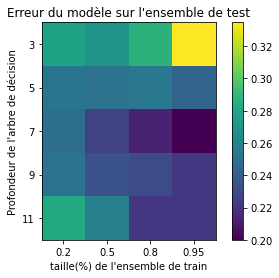

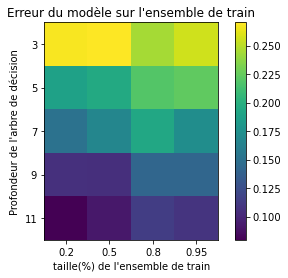

In [122]:
plotErreur(restest, "test")
plotErreur(restrain, "train")